In [320]:
import numpy as np #importing the necessary libraries/modules
import pandas as pd
import string 

In [321]:
df = pd.read_csv("spam.csv",encoding="latin1")#imported the csv file and made a data frame from it

In [322]:
df.sample(5)#seeing if our data frame is successfully made or not

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1301,ham,I tot u reach liao. He said t-shirt.,NaN,NaN,NaN
1674,ham,Nah dub but je still buff,NaN,NaN,NaN
4448,spam,Urgent UR awarded a complimentary trip to Euro...,NaN,NaN,NaN
4496,ham,Ok,NaN,NaN,NaN
4051,ham,"Ya ok, then had dinner?",NaN,NaN,NaN


In [323]:
df.shape #checking total number of values in the data

(5572, 5)

In [324]:
# In the following section i have removed the unnecessary columns ,
#renamed the columns according to my needs,
#adjusted the values of the result to 0 or 1 to perform binary classification, 
#treated duplicate or missing values,
#This process is called DATA CLEANING

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [326]:
#droping unnecessary columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [328]:
#remaning the columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [329]:
df.sample(5)

,target,text
1768,ham,How. Its a little difficult but its a simple w...
3107,ham,Hello hun how ru? Its here by the way. Im good...
4934,ham,"Hey babe, how's it going ? Did you ever figure..."
1577,ham,Remember all those whom i hurt during days of ...
3637,spam,Customer service announcement. We recently tri...


In [330]:
#now i have changed the values of ham/spam to 0/1

In [331]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [332]:
df["target"]=encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [333]:
#now i will check for and empty/null rows

In [334]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [335]:
# no null values exists

In [336]:
#Now i will check for duplicates and if any exists i will remove them
df.duplicated().sum()

403

In [337]:
df=df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [338]:
df.shape

(5169, 2)

In [339]:
#Now i will perform EDA (EXPLORATORY DATA ANALYSIS)
#this is done to decide how out model will work and what should be the basis of detection and which algorithm to be used

In [340]:
#first of all i will check how many data is spam ans how much is not and try to find the balance of the data 

In [341]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [342]:
# more messages are not-spam hence we need prediction to be more accurate than accuracy
# now checking the balance

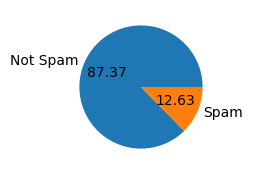

In [343]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.pie(df["target"].value_counts(),labels=["Not Spam","Spam"],autopct="%0.2f")
plt.show()

In [344]:
# the balace of data is largely towards not-spam hence the data is imbalaced

In [345]:
# Now i am gonna count the nunber of characters,words,and sentences in each message and add them in our data frame 
# And then i will plot them on the different graphs and try to get more information on/from them

In [346]:
import nltk

In [347]:
nltk.download("punkt")#used for tokeniation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [348]:
df["num_characters"]=df["text"].apply(len)#counting number of columns

In [349]:
df.sample(5)

,target,text,num_characters
3169,0,"Mah b, I'll pick it up tomorrow",31
614,0,I called and said all to him:)then he have to ...,65
2292,0,:-( that's not v romantic!,26
3950,0,Hi dude hw r u da realy mising u today,38
209,0,Both :) i shoot big loads so get ready!,39


In [350]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [351]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))#counting number of words

In [352]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [353]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))#counting number of sentences

In [354]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [355]:
# here we are done adding the columns , now i will try to gain some information on them

In [356]:
df[["num_characters","num_words","num_sentences"]].describe()#information on the data as a whole

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [357]:
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()#information on only not spam data

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [358]:
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()#information on only spam data

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [359]:
#now i will plot it on the graph to see the relationship among the data (between spam and not spam based on these columns)

In [360]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


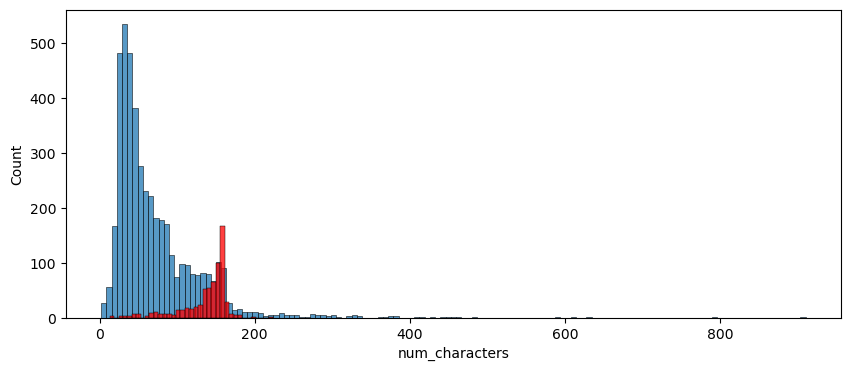

In [361]:
plt.figure(figsize=(10,4))
sns.histplot(df[df["target"]==0]["num_characters"])#not_spam data according to characters
sns.histplot(df[df["target"]==1]["num_characters"],color="red")#spam data according to characters
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


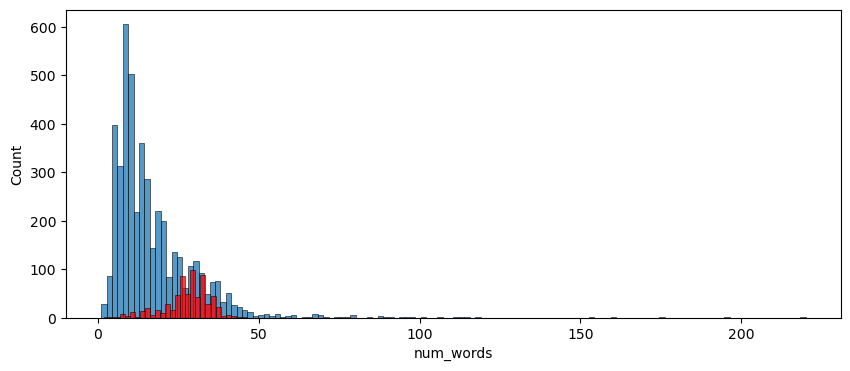

In [362]:
plt.figure(figsize=(10,4))
sns.histplot(df[df["target"]==0]["num_words"])#not_spam data according to words
sns.histplot(df[df["target"]==1]["num_words"],color="red")#spam data according to words
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


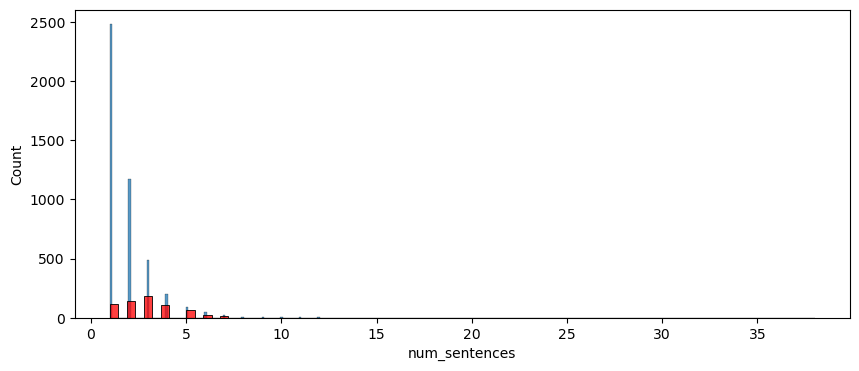

In [363]:
plt.figure(figsize=(10,4))
sns.histplot(df[df["target"]==0]["num_sentences"])#not_spam data according to sentences
sns.histplot(df[df["target"]==1]["num_sentences"],color="red")#spam data according to sentences
plt.show()

In [364]:
# from the above plots we can conclude that the number of characters,words,sentences are more in spam messages and there are also outliers

In [365]:
# now i will find and plot the relation among these three columns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x400 with 0 Axes>

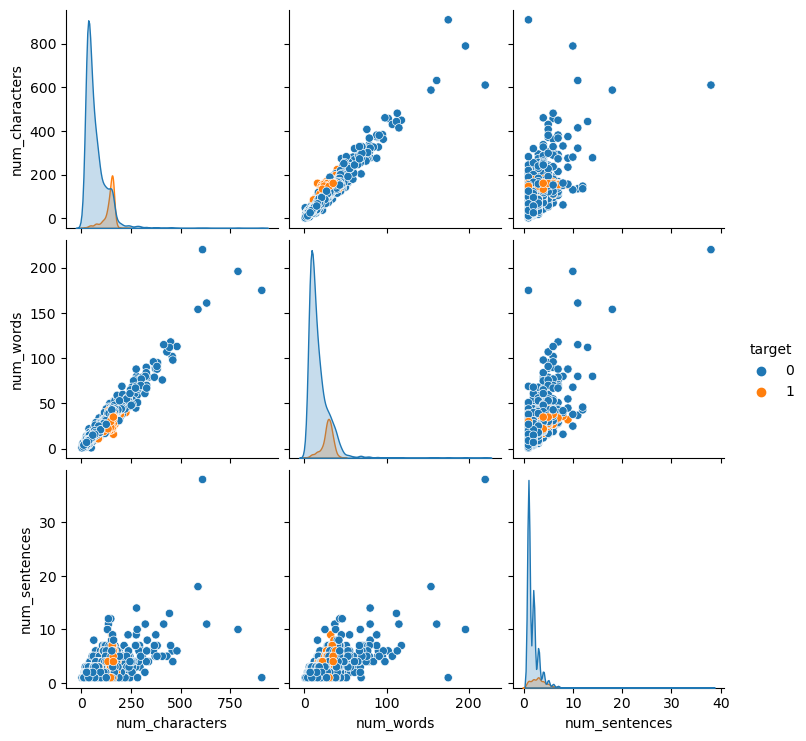

In [366]:
plt.figure(figsize=(10,4))
sns.pairplot(df,hue="target")
plt.show()

                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


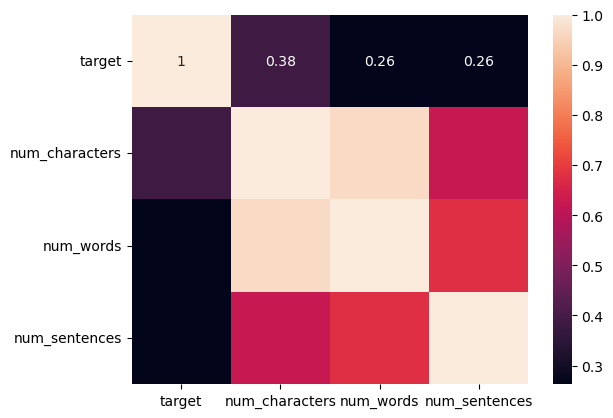

In [367]:
correlation_matrix=df[["target","num_characters","num_words","num_sentences"]].corr()#using pearson correlation
sns.heatmap(correlation_matrix,annot=True)
print(correlation_matrix)

In [368]:
# from the heat map above we can conclude that there is a high corelation between char,words and sentances so we can choose only one 
#since the relation between the char and the target is the highest we will choose characters

In [369]:
#Up next i am gonna perform DATA PREPROCESSING
#in this stage we make changes to our data in order to make it fit for our model,so that it can perform analysis easily and fastly

In [370]:
#in this we will majorly perform six steps:-
#1.convert everthing to lowercase
#2.tokenization - breaking text into smaller meaningful tokens i.e meanigful words
#3.removing special characters
#4.removing stopwords and punctuations
#5.stemming or lamatization - converting all he form of words into one
#6.find out the top words in each field spam and not-spam

In [371]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [372]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
from nltk.corpus import stopwords
# stopwords.words("english")

In [373]:
#lets make a function to perform first five tasks
def text_transform(text):
    text=text.lower() #converterd  to lower case
    text=nltk.word_tokenize(text) #tokenized text

    y=[]
    for i in text:
        if i.isalnum():#only alpha numeric
            y.append(i)
    text = y[:]
    y.clear()

    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:#only non stopwords and punctuations
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [374]:
df["transformed_text"]=df["text"].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [375]:
from wordcloud import WordCloud

In [376]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

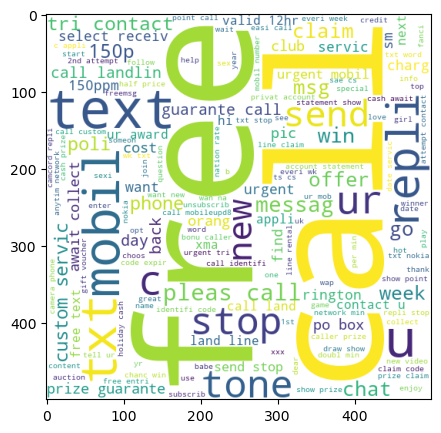

In [377]:
#making a word cloud for SPAM messages to see the mst common messages
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,5))
plt.imshow(spam_wc)

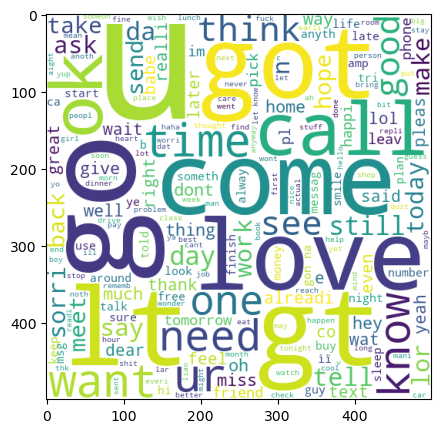

In [378]:
#making a word cloud for NOT SPAM messages to see the mst common messages
not_spam_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,5))
plt.imshow(not_spam_wc)

In [379]:
#lets make a list of all the words in spam and not_spam messages 
#and plot them on a barplot to see the top words in each fields and their frequency

In [380]:
#For SPAM messages

In [381]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [382]:
#for NOT SPAM Messages

In [383]:
not_spam_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)
len(not_spam_corpus)

35404

In [384]:
#now lets plot graphs for both the cases

In [385]:
from collections import Counter

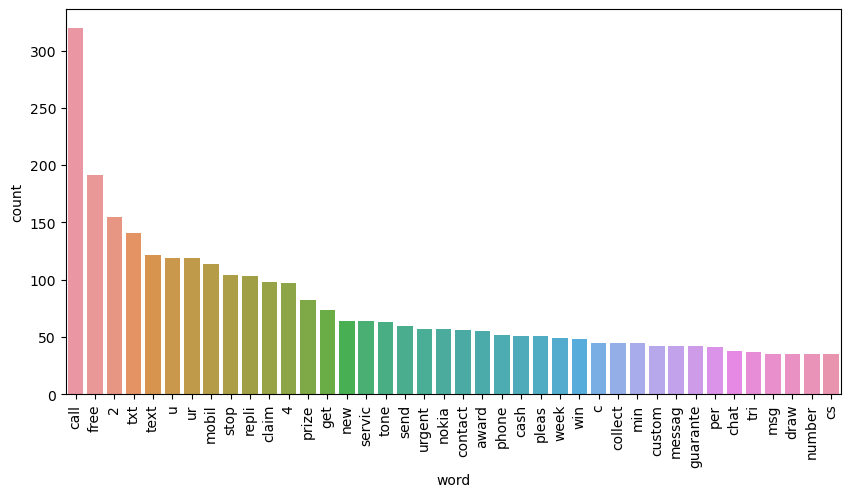

In [386]:
#for SPAM messages
spam_counter = Counter(spam_corpus)
common_spam_words = pd.DataFrame(spam_counter.most_common(40), columns=['word', 'count'])
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=common_spam_words)
plt.xticks(rotation='vertical')
plt.show()

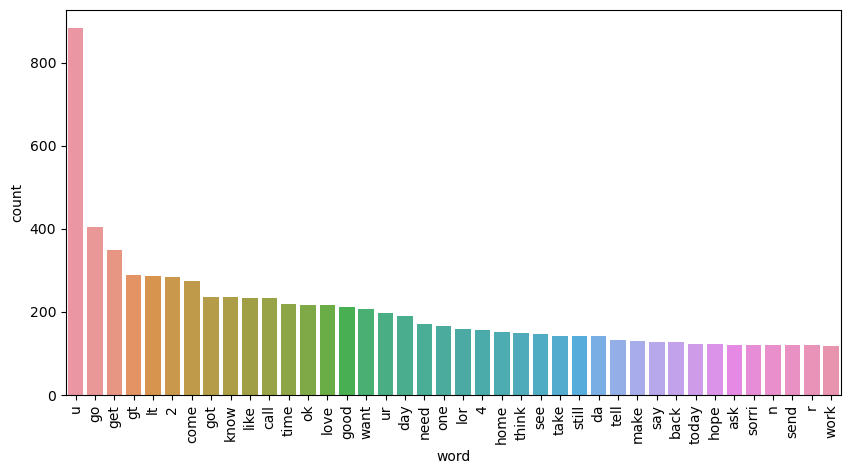

In [387]:
#for NOT-SPAM messages
not_spam_counter = Counter(not_spam_corpus)
common_not_spam_words = pd.DataFrame(not_spam_counter.most_common(40), columns=['word', 'count'])
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=common_not_spam_words)
plt.xticks(rotation='vertical')
plt.show()

In [388]:
#now we are done with all the steps we need before building the model so now we can move to the model building

In [389]:
#model Building

In [390]:
#first lets vectorize our text
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3200)

In [391]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()
x.shape

(5169, 3200)

In [392]:
y=df["target"].values
y.shape

(5169,)

In [393]:
#now lets divide our data to traning and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [394]:
#it is said that naive bayes algorithm works best for binary classification process thats why i am gonna apply it first
#here i am gonna apply all three deviations of naive bayes and test out which one is the best and we will use that.

In [395]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [396]:
#making object of the algorithm
mnb=MultinomialNB()

In [397]:
# applying GaussianNB and checking its score
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [398]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))